In [16]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [17]:
env = gym.make('CliffWalking-v0')
env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


36

In [18]:
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Epsilon-greedy parameter
episodes = 500  # Number of episodes

In [19]:
q_table_q_learning = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_q_learning)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [20]:
action = env.action_space.sample( )
# 2. Implement this action and move the agent in the desired direction
state, reward, done, info = env.step(action)
# Display the results ( reward and map)
env.render()
print(f"Reward = {reward}")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Reward = -1


In [21]:
env.reset()
env.render()

In [22]:
# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(q_table_q_learning)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [23]:
total_reward = 0
eps_reward = []

for i in range(episodes):
    state = env.reset()
    done = False
    # Until the agent gets stuck in a hole or reaches the goal , keep training it
    while not done:
    # Choose the action with the highest value in the current state
        if np.max(q_table_q_learning[state]) > 0:
            action = np.argmax(q_table_q_learning[state])
        # If there's no best action ( only zeros ) , take a random one
        else:
            action = env.action_space.sample()
        # Implement this action and move the agent in the desired direction
        new_state , reward , done, info = env.step(action)
        # Update Q (s, a )
        q_table_q_learning[state, action] = q_table_q_learning[state, action] + alpha * ( reward + gamma*np.max(q_table_q_learning[new_state]) - q_table_q_learning[state , action])
        # Update our current state
        state = new_state
        # If we have a reward , it means that our outcome is a success
#         if reward:
#             outcomes[-1] = ("Success")
        total_reward += reward
    eps_reward.append(total_reward)
    total_reward = 0

Q-table after training:
[[  -7.94108868   -7.71232075   -7.71232075   -7.94108868]
 [  -7.71232075   -7.45813417   -7.45813417   -7.94108868]
 [  -7.45813417   -7.17570464   -7.17570464   -7.71232075]
 [  -7.17570464   -6.86189404   -6.86189404   -7.45813417]
 [  -6.86189404   -6.5132156    -6.5132156    -7.17570464]
 [  -6.5132156    -6.12579511   -6.12579511   -6.86189404]
 [  -6.12579511   -5.6953279    -5.6953279    -6.5132156 ]
 [  -5.6953279    -5.217031     -5.217031     -6.12579511]
 [  -5.217031     -4.68559      -4.68559      -5.6953279 ]
 [  -4.68559      -4.0951       -4.0951       -5.217031  ]
 [  -4.0951       -3.439        -3.439        -4.68559   ]
 [  -3.439        -3.439        -2.71         -4.0951    ]
 [  -7.94108868   -7.45813417   -7.45813417   -7.71232075]
 [  -7.71232075   -7.17570464   -7.17570464   -7.71232075]
 [  -7.45813417   -6.86189404   -6.86189404   -7.45813417]
 [  -7.17570464   -6.5132156    -6.5132156    -7.17570464]
 [  -6.86189404   -6.12579511   

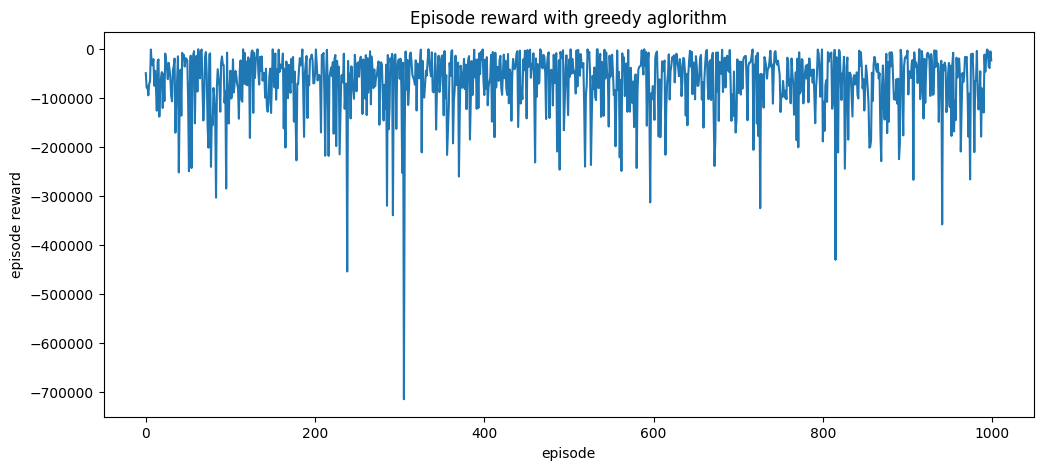

In [24]:
print('=========================')
print('Q-table after training:')
print(q_table_q_learning)
# Plot reward
plt.figure(figsize=(12, 5))
plt.xlabel("episode")
plt.ylabel("episode reward")
plt.title("Episode reward with greedy aglorithm")
plt.plot(range(len(eps_reward)), eps_reward)

In [25]:
def test_policy(q_table):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_reward += reward

    return total_reward

print("\nTesting Q-learning policy:")
q_learning_reward = test_policy(q_table_q_learning)
print(f"Total reward: {q_learning_reward}")





Testing Q-learning policy:
Total reward: -13


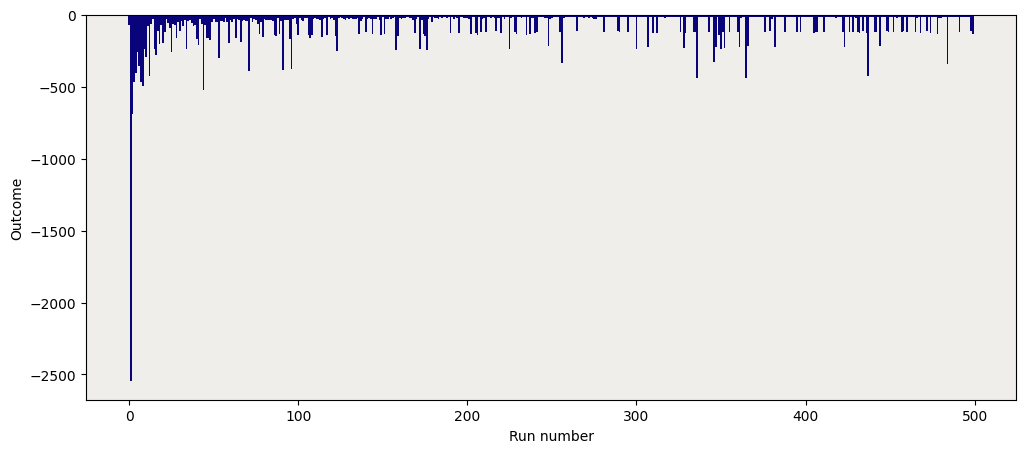

In [26]:
# Add the necessary import statement at the beginning of your code
import matplotlib.pyplot as plt
import gym
import numpy as np
# Assuming 'outcomes' should store rewards over episodes
outcomes = []

alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Epsilon-greedy parameter
episodes = 500  # Number of episodes
q_table_q_learning = np.zeros((env.observation_space.n, env.action_space.n))


def epsilon_greedy_policy(state, q_table):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0  # Initialize total reward for the episode

    while not done:
        action = epsilon_greedy_policy(state, q_table_q_learning)
        next_state, reward, done, _ = env.step(action)

        best_next_action = np.argmax(q_table_q_learning[next_state])
        td_target = reward + gamma * q_table_q_learning[next_state][best_next_action]
        td_error = td_target - q_table_q_learning[state][action]
        q_table_q_learning[state][action] += alpha * td_error

        state = next_state
        total_reward += reward  # Accumulate reward for the episode

    outcomes.append(total_reward)  # Store the total reward for the episode


# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [27]:
def test_policy(q_table):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_reward += reward

    return total_reward

print("\nTesting Q-learning policy:")
q_learning_reward = test_policy(q_table_q_learning)
print(f"Total reward: {q_learning_reward}")





Testing Q-learning policy:
Total reward: -13
